In [3]:
import os
import numpy as np
import torch
from PIL import Image
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

import gc
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
from torchvision.datasets import DatasetFolder, VisionDataset
# This is for the progress bar.
from tqdm.auto import tqdm
import random
from pathlib import Path
import math
import cv2
import matplotlib.pyplot as plt
from utils.gen_mask import gen_mask
import pathlib
from collections import defaultdict

import PIL.Image

import torch
import torch.utils.data

import torchvision

In [4]:
def get_valid_data(labels):
    valid_data = []
    for i in range(len(labels)):
        for j in range(len(labels.iloc[i]['annotations'])):
            if labels.iloc[i]['annotations'][j]['type'] == "blood_vessel":
                valid_data.append(labels.iloc[i]['id'])
                break
    
    return valid_data

In [5]:
ROOT = Path("hubmap-hacking-the-human-vasculature")
polygon_file = "polygons.jsonl"
image_folder = "train"
metadata_file = "tile_meta.csv"
labels = pd.read_json(ROOT / "polygons.jsonl" , lines=True)
matadata = pd.read_csv(ROOT / "tile_meta.csv")
id_list = get_valid_data(labels)

In [8]:
import transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        # 水平翻轉
        # 
        # transforms.append(T.RandomIoUCrop())
        # transforms.append(T.FixedSizeCrop((512,512)))

        # transforms.append(T.RandomHorizontalFlip(0.5))
        # transforms.append(T.RandomZoomOut(side_range = (1,1.15)))
        # transforms.append(T.RandomPhotometricDistort())
        transforms.append(T.ScaleJitter((512,512) , (0.75,1.25)))
        # transforms.append(T.SimpleCopyPaste())

        # transforms.append(T.RandomShortestSize(min_size = 250 , max_size = 400))
    return T.Compose(transforms)

0006ff2aa7cd


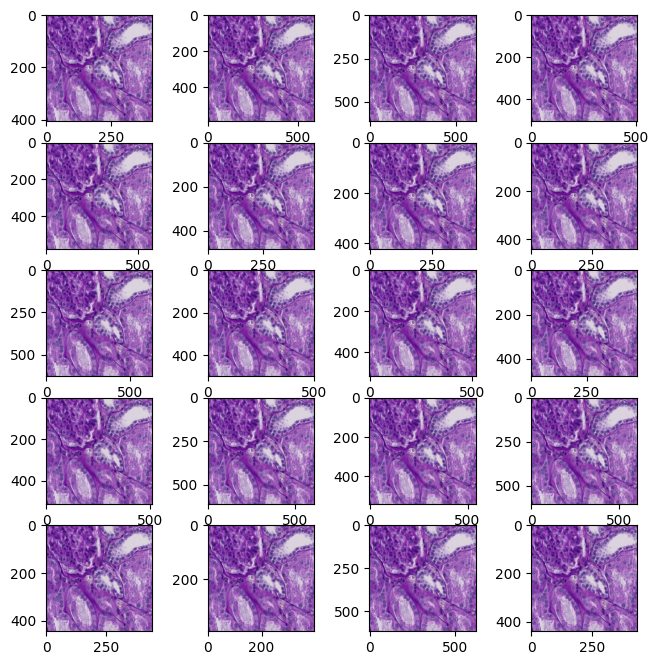

In [9]:
w = 10
h = 10
tfm = get_transform(True)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
print(id_list[0])
for i in range(1, columns*rows +1):
    # break
    annotations = labels[labels["id"] == id_list[0]]["annotations"].values[0]
    # print(annotations)
    boxes , masks , area = gen_mask(annotations)
    target = {}
    target["boxes"] = boxes
    target["area"] = area
    target["masks"] = masks
    target["labels"] = np.ones(len(boxes))
    im = Image.open(ROOT / "train" / f"{id_list[0]}.tif")
    
    im , target = tfm(im , target)
    fig.add_subplot(rows, columns, i)
    plt.imshow( im.permute(1, 2, 0))
    # plt.imshow(im)
plt.show()